In [121]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('new_model.csv')
df.head(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


In [4]:
#Bp :Blood Pressure
#Sg :Specific Gravity
#Al :Albumin
#Su :Sugar
#Rbc :Red Blood Cell
#Bu :Blood Urea
#Sc :Serum Creatinine
#Sod :Sodium
#Pot:Pottasium
#Hemo:Hemoglobin
#Wbcc:White Blood Cell Count
#Rbcc ::Red Blood Cell Count
#Htn :Hypertension

In [7]:
df.shape

(400, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [10]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [30]:
df.isna().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

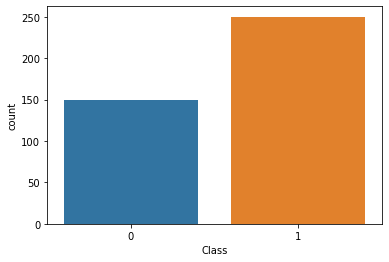

In [11]:
sns.countplot(df.Class)

In [12]:
#normal Bp >= 120 
df_normal = df[df['Bp']>=120]
df_abnormal = df[df['Bp']<120]


In [20]:
df_normal['Class'].value_counts()

1    3
Name: Class, dtype: int64

In [21]:
df_abnormal['Class'].value_counts()

1    247
0    150
Name: Class, dtype: int64

In [22]:
min_sg, max_sg = df["Sg"].min(), df["Sg"].max()

if min_sg < 1.005 and max_sg > 1.030:
    print("Abnormal specific gravity values are present in the dataset.")
else:
    print("No abnormal specific gravity values detected in the dataset.")

No abnormal specific gravity values detected in the dataset.


<AxesSubplot:xlabel='Bp', ylabel='Class'>

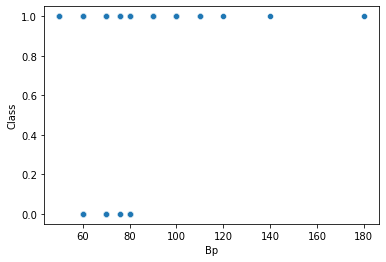

In [34]:
sns.scatterplot(x=df.Bp ,y=df.Class, data= df)

array([[<AxesSubplot:title={'center':'Bp'}>,
        <AxesSubplot:title={'center':'Sg'}>,
        <AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Su'}>],
       [<AxesSubplot:title={'center':'Rbc'}>,
        <AxesSubplot:title={'center':'Bu'}>,
        <AxesSubplot:title={'center':'Sc'}>,
        <AxesSubplot:title={'center':'Sod'}>],
       [<AxesSubplot:title={'center':'Pot'}>,
        <AxesSubplot:title={'center':'Hemo'}>,
        <AxesSubplot:title={'center':'Wbcc'}>,
        <AxesSubplot:title={'center':'Rbcc'}>],
       [<AxesSubplot:title={'center':'Htn'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

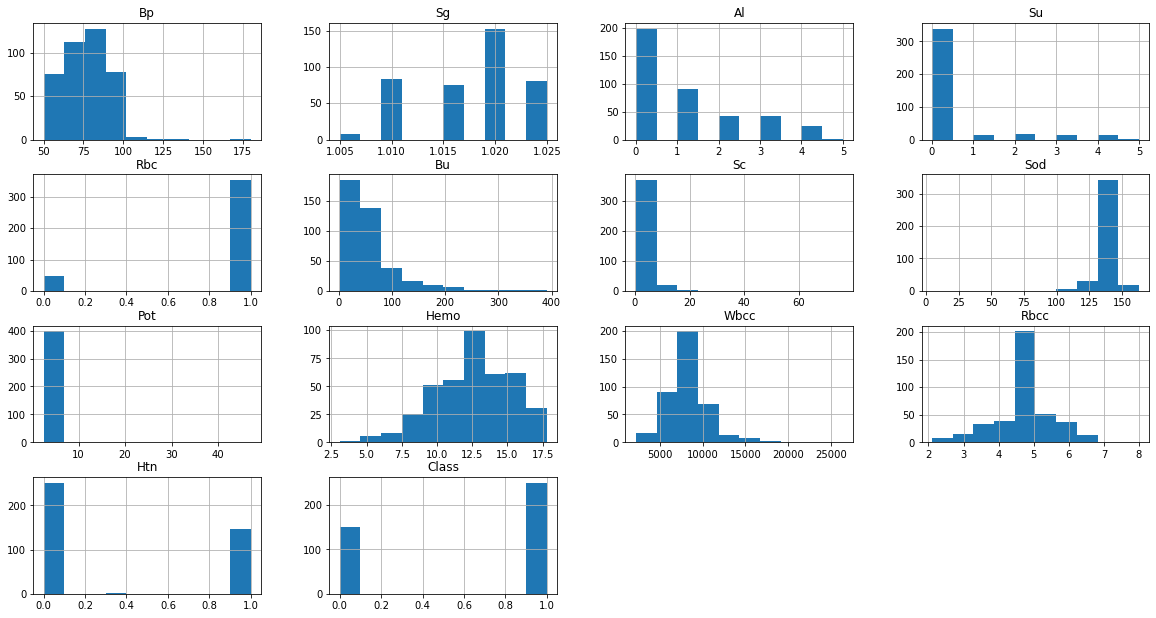

In [37]:
df.hist(figsize=(20,10.5))

In [49]:
df_rbc = df.groupby(['Rbc'])['Class'].value_counts()
df_rbc

Rbc  Class
0.0  1         47
1.0  1        203
     0        150
Name: Class, dtype: int64

<AxesSubplot:xlabel='Rbc', ylabel='Class'>

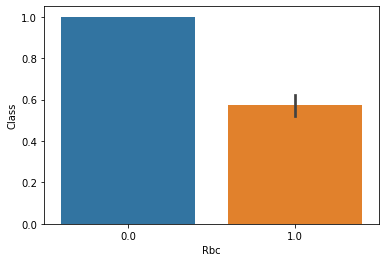

In [53]:

sns.barplot(x=df.Rbc,y=df.Class,data=df)

In [54]:
#normal_sc= df[df["Sc"]>=0.6 and df["Sc"]<=1.3]
normal_sc=df.query('Sc>=0.6 and Sc<=1.3')
abnormal_sc=df.query('Sc < 0.6 or Sc > 1.3')

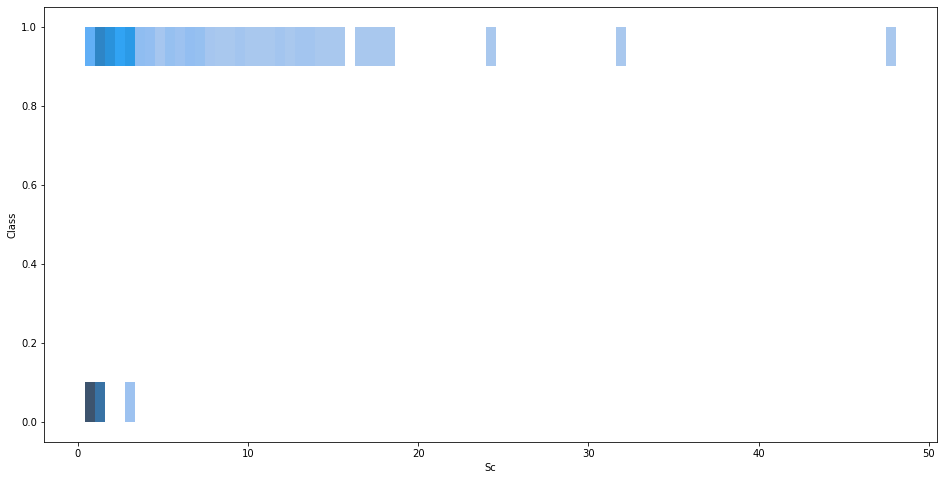

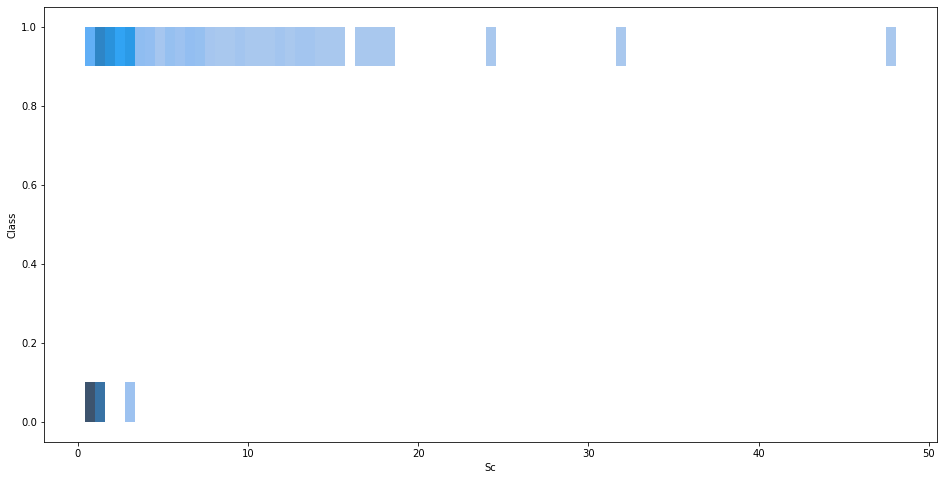

In [80]:
plt.figure(figsize=[16,8])
plt1 = sns.histplot(normal_sc,x= df.Sc,y=df.Class)
plt.show()
plt.figure(figsize=[16,8])

plt2 =sns.histplot(abnormal_sc,x= df.Sc,y=df.Class)
plt.show()

<AxesSubplot:xlabel='Al', ylabel='Class'>

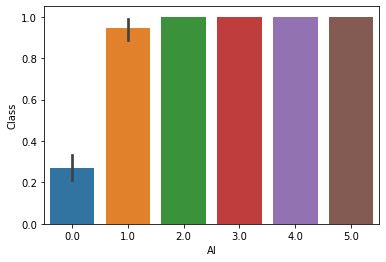

In [87]:
sns.barplot(x=df.Al,y=df.Class)

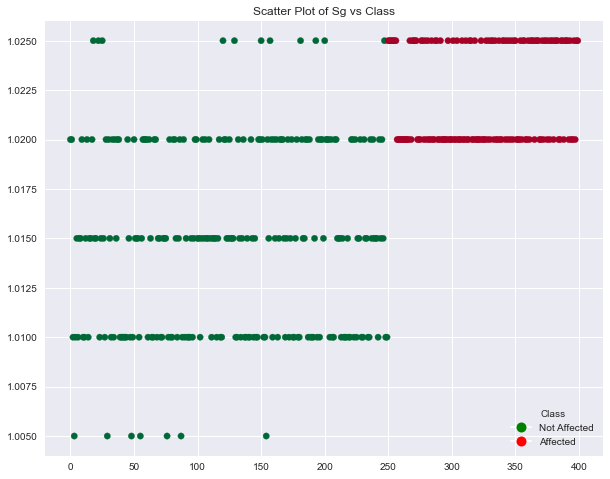

In [96]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df.index, df['Sg'], c=df['Class'], cmap='RdYlGn', s=40)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Not Affected'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Affected')]

ax.legend(handles=legend_elements, title='Class')

ax.set_title('Scatter Plot of Sg vs Class')

plt.show()

<AxesSubplot:>

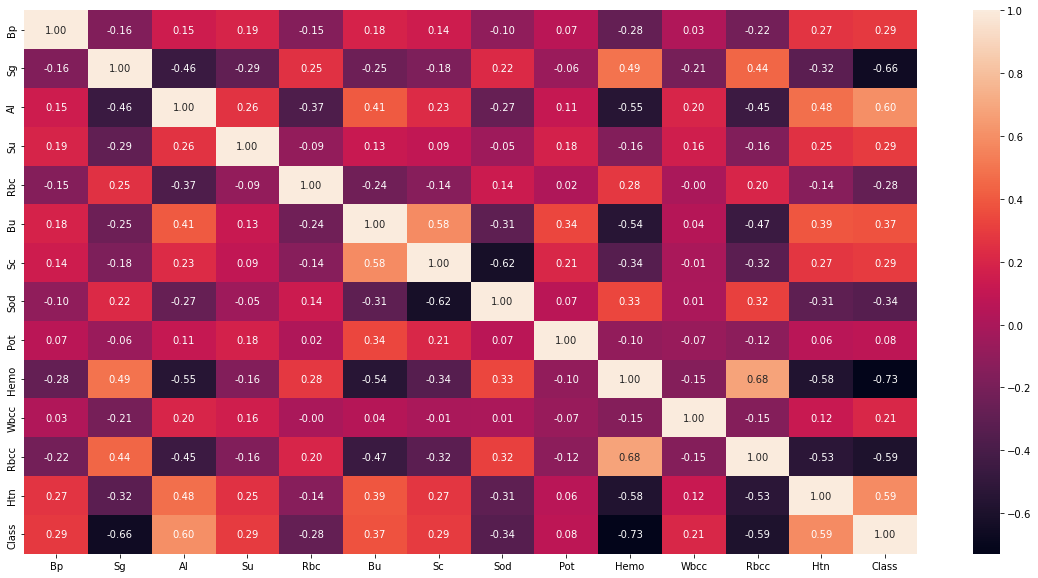

In [42]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [69]:
df["Sod"].max()

163.0

In [70]:
df["Sod"].min()


4.5

In [71]:
#very_low sod value 
df[df["Sod"]==4.5]

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
21,90.0,1.02,1.0,0.0,1.0,180.0,76.0,4.5,4.63,10.9,6200.0,3.6,1.0,1


In [72]:
df=df.drop(df.index[df["Sod"]==4.5])
df.reset_index()

,index,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
395,396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
396,397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
397,398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [95]:
x = df.drop(['Class'],axis=1)
y=df.Class

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [116]:
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [117]:
models = [log_model,
         dt_model,
         rf_model,
         knn_model,
         svm_model]

In [154]:
#function to apply cross validation to each model 
def train_and_evaluate_models(models, x, y, cv):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        cv_scores = cross_val_score(model, x, y, cv=cv)
        scores[model_name] = cv_scores.mean()
    return scores


In [156]:
cv_scores = train_and_evaluate_models(models, x_train_scaled, y_train, 5)
cv_scores

{'LogisticRegression': 0.9793239683933276,
 'DecisionTreeClassifier': 0.9705882352941178,
 'RandomForestClassifier': 0.9911764705882353,
 'KNeighborsClassifier': 0.9823090430201932,
 'SVC': 0.9881913959613696}

In [157]:
df_cv = pd.DataFrame.from_dict(cv_scores,orient='index', columns=['Cross_Validation_Score'])
df_cv

,Cross_Validation_Score
LogisticRegression,0.979324
DecisionTreeClassifier,0.970588
RandomForestClassifier,0.991176
KNeighborsClassifier,0.982309
SVC,0.988191


In [149]:
best_models = [
    log_model,
         dt_model,
         rf_model,
         knn_model,
         svm_model]


In [158]:

def train_and_evaluate_models(models, x_train, y_train, x_test, y_test):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)

        scores[model_name] = {
            accuracy
        }
    return scores

In [161]:
scores = train_and_evaluate_models(best_models, x_train_scaled, y_train, x_test_scaled, y_test)
df_scores = pd.DataFrame.from_dict(scores,orient='index',columns=['Models'])
df_scores

,Models
LogisticRegression,0.983333
DecisionTreeClassifier,0.950000
RandomForestClassifier,0.983333
KNeighborsClassifier,0.983333
SVC,0.983333


In [169]:
Accuracy=[]
def all(model):
    model.fit(x_train_scaled,y_train)
    pred = model.predict(x_test_scaled)
    
    acc=accuracy_score(y_test,pred) 
    Accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test,pred)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix  Normalization
    print('Normalized confusion matrix')
    # Calculate confusion matrix
    cm1 = confusion_matrix(y_test,pred, normalize='true')
    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test,pred))
    print('accuracy_score : ' , acc)

confusion matrix


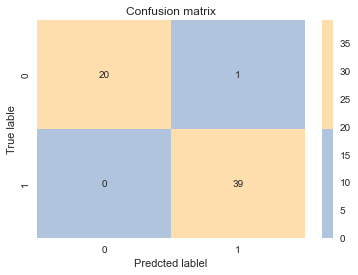

Normalized confusion matrix


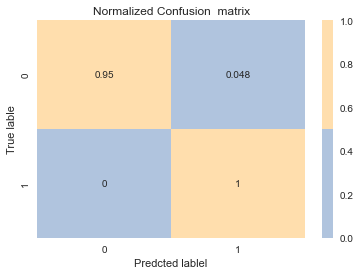

[[20  1]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        39

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

accuracy_score :  0.9833333333333333


In [170]:
all(log_model)

confusion matrix


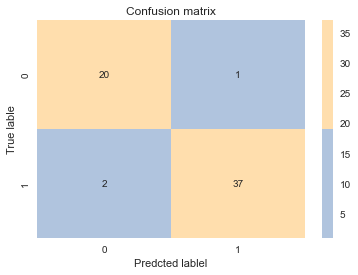

Normalized confusion matrix


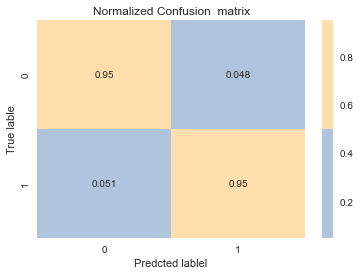

[[20  1]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.95      0.96        39

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

accuracy_score :  0.95


In [171]:
all(dt_model)


confusion matrix


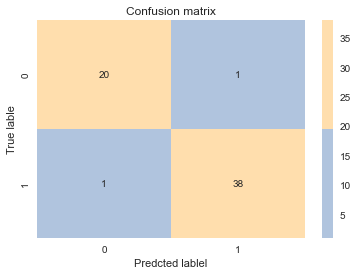

Normalized confusion matrix


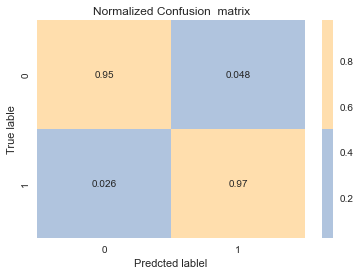

[[20  1]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        39

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

accuracy_score :  0.9666666666666667


In [172]:
all(rf_model)
      

confusion matrix


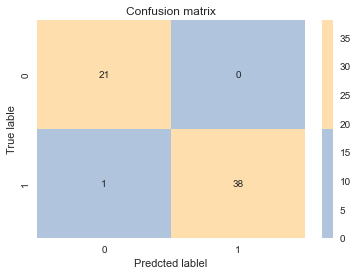

Normalized confusion matrix


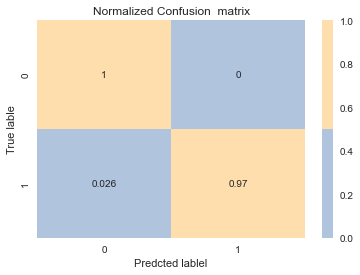

[[21  0]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.99        39

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

accuracy_score :  0.9833333333333333


In [174]:
all(knn_model)
       

confusion matrix


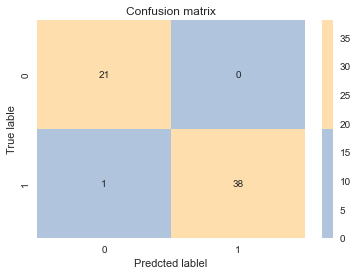

Normalized confusion matrix


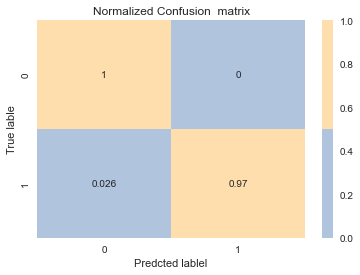

[[21  0]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.99        39

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

accuracy_score :  0.9833333333333333


In [175]:
all(svm_model)